<a href="https://colab.research.google.com/github/Jacquedelest/Marketplace-Phone-Selling-in-2020/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset

In [ ]:
import pandas as pd
phone_sales = pd.read_csv("marketplace.csv")

Show structure of columns and rows from dataframe

In [10]:
phone_sales.shape

(26014, 16)

Preview dataframe

In [9]:
phone_sales.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


**The data is a data phone selling on January to May 2020, fetched daily by crawling the engine.**

Column explanations:

`date `is the date which a product of a merchant being recorded in one day.

`sku_name` is the name of the product appear in marketplace.

`product_id` is product type recorded in ID.

`merchant_code` is merchant shops symbollized by code.

`merchant_badge` is type of merchant.

`product_type` is the product being sold in a certain merchant.

`merchant_city` is origin city of merchant.

`cod` is available cash payment when the product arrived.

`price` is product pricing in the recorded date.

`stock` is stock of product in the recorded date.

`daily_gmv` is daily gross merchandise value.

`daily_sold` is number of daily sold products.

`daily_view` is number of daily view products.

`rating` is product rating.

`total_view` is total product view.

`total_sold` is total sold product.

Descriptive statistic of dataframe

In [11]:
.phone_sales.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,26007.000000,2.601400e+04,26014.000000,2.601400e+04,26014.000000,26014.000000,26014.000000,26014.000000,26014.000000
mean,1562.011112,3.890569e+06,344553.702083,1.582145e+06,0.737257,58.814331,98.339279,46.343969,152.429807
std,1041.170081,3.868790e+06,474104.795100,1.603716e+07,7.453432,473.091001,5.485507,91.149600,321.367828
min,1.000000,5.350000e+05,0.000000,-2.342700e+08,-82.000000,0.000000,0.000000,0.000000,0.000000
25%,854.000000,1.770000e+06,4.000000,0.000000e+00,0.000000,2.000000,98.000000,10.000000,27.000000
50%,1252.000000,2.599999e+06,37.000000,0.000000e+00,0.000000,5.000000,100.000000,24.000000,63.000000
75%,2287.000000,4.093925e+06,999972.000000,0.000000e+00,0.000000,21.000000,100.000000,44.000000,144.000000
max,4247.000000,5.000000e+07,999999.000000,9.415350e+08,441.000000,38993.000000,100.000000,2842.000000,7724.000000


In [32]:
phone_sales.var()

merchant_code    1.084035e+06
cod              1.109916e-02
price            1.496754e+13
stock            2.247754e+11
daily_gmv        2.571904e+14
daily_sold       5.555365e+01
daily_view       2.238151e+05
rating           3.009078e+01
total_review     8.308250e+03
total_sold       1.032773e+05
dtype: float64

In [12]:
phone_sales.describe(include='O')

,date,sku_name,product_id,merchant_badge,product_type,merchant_city
count,26014,26014,26014,26014,26014,26014
unique,41,11397,12120,3,361,136
top,4/19/2020,Apple Iphone 7 32Gb Garansi Distributor 1 tahun,F1287,PM,Realme 6,Kota Administrasi Jakarta Barat
freq,915,33,11,20353,2161,4676


Data distribution with histogram

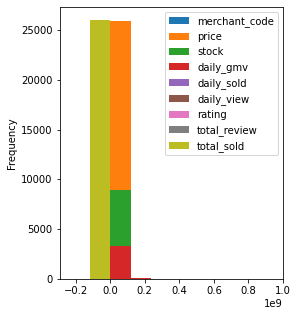

In [46]:
import matplotlib.pyplot as plt
phone_sales.plot.hist(figsize=(4,5), bins=10)
plt.show()

Find outlier

In [35]:
Q1 = phone_sales.quantile(0.25)
Q3 = phone_sales.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

merchant_code       1433.0
cod                    0.0
price            2323925.0
stock             999968.0
daily_gmv              0.0
daily_sold             0.0
daily_view            19.0
rating                 2.0
total_review          34.0
total_sold           117.0
dtype: float64


In [41]:
(phone_sales < (Q1 - 1.5*IQR)) | (phone_sales > (Q3 + 1.5*IQR))

,cod,daily_gmv,daily_sold,daily_view,date,merchant_badge,merchant_city,merchant_code,price,product_id,product_type,rating,sku_name,stock,total_review,total_sold
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
26010,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
26011,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True
26012,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False


Rename columns

In [51]:
phone_sales.rename(columns={'date' : 'Date',
                            'sku_name' : 'Product Name',
                            'product_id' : 'Product ID',
                            'merchant_code' : 'Merchant Code',
                            'merchant_badge' : 'Merchant Badge',
                            'product_type' : 'Product Type',
                            'merchant_city' : 'Merchant City',
                            'cod' : 'Cash on Delivery',
                            'price' : 'Price',
                            'stock' : 'Stock',
                            'daily_gmv' : 'Daily GMV',
                            'daily_sold' : 'Daily Sold',
                            'daily_view' : 'Daily View',
                            'raiting' : 'Raiting',
                            'total_review' : 'Total View',
                            'total_sold' : 'Total Sold'
                            }, 
                   inplace=True)

Summary by aggregated columns

In [64]:
#sum of sold each phones
phone_sales['Total Sold'].groupby(phone_sales['Product Type']).sum()

Product Type
Apple iPhone                 597
Apple iPhone 11             6209
Apple iPhone 11 Pro         4473
Apple iPhone 11 Pro Max     7087
Apple iPhone 4               130
                           ...  
vivo Y93                   17705
vivo Y95                   15709
vivo Z1                       29
vivo Z1Pro                 15567
vivo iQOO Pro               1602
Name: Total Sold, Length: 361, dtype: int64

In [63]:
#mean of sold each phones
phone_sales['Total Sold'].groupby(phone_sales['Product Type']).mean()

Product Type
Apple iPhone                19.258065
Apple iPhone 11             25.342857
Apple iPhone 11 Pro         27.441718
Apple iPhone 11 Pro Max     31.220264
Apple iPhone 4               6.842105
                              ...    
vivo Y93                   158.080357
vivo Y95                   201.397436
vivo Z1                     29.000000
vivo Z1Pro                 127.598361
vivo iQOO Pro              100.125000
Name: Total Sold, Length: 361, dtype: float64

In [67]:
#sum of sold each phones by merchant cities
phone_sales['Total Sold'].groupby([phone_sales['Merchant City'], phone_sales['Product Type']]).sum()

Merchant City    Product Type              
Kab. Badung      Apple iPhone 6                  24
                 Apple iPhone 6s Plus             4
                 Apple iPhone 8 Plus              4
                 Apple iPhone X                  12
                 Oppo A9                        122
                                               ... 
Kota Yogyakarta  Xiaomi Redmi Note 8 Pro        430
                 Xiaomi Redmi S2 (Redmi Y2)    1305
                 vivo V15                       279
                 vivo V9                        190
                 vivo Y17                        85
Name: Total Sold, Length: 3089, dtype: int64

In [68]:
#mean of sold each phones by merchant cities
phone_sales['Total Sold'].groupby([phone_sales['Merchant City'], phone_sales['Product Type']]).mean()

Merchant City    Product Type              
Kab. Badung      Apple iPhone 6                 24.000000
                 Apple iPhone 6s Plus            2.000000
                 Apple iPhone 8 Plus             4.000000
                 Apple iPhone X                  2.400000
                 Oppo A9                        40.666667
                                                  ...    
Kota Yogyakarta  Xiaomi Redmi Note 8 Pro        53.750000
                 Xiaomi Redmi S2 (Redmi Y2)    261.000000
                 vivo V15                       93.000000
                 vivo V9                        38.000000
                 vivo Y17                       85.000000
Name: Total Sold, Length: 3089, dtype: float64

Sort data to see total sold phones per each cities

In [73]:
phonesales_sort =phone_sales.sort_values(by=["Merchant City","Total Sold"], ascending=[True,False])
phonesales_sort

,Date,Product Name,Product ID,Merchant Code,Merchant Badge,Product Type,Merchant City,Cash Payment,Price,Stock,Daily GMV,Daily Sold,Daily View,rating,Total View,Total Sold
23006,4/28/2020,XIAOMI REDMI NOTE 8 PRO RAM 6GB ROM 128GB GARA...,F2868,920.0,PM,Xiaomi Redmi Note 8 Pro,Kab. Badung,False,3280000,2,3280000,1,66,100,25,64
23114,4/23/2020,XIAOMI REDMI NOTE 8 PRO RAM 6GB ROM 128GB GARA...,F2868,920.0,PM,Xiaomi Redmi Note 8 Pro,Kab. Badung,False,3280000,4,42640000,13,2211,100,20,61
22961,4/19/2020,XIAOMI REDMI NOTE 8 PRO RAM 6GB ROM 128GB GARA...,F2843,920.0,PM,Xiaomi Redmi Note 8 Pro,Kab. Badung,False,3295000,2,0,0,75,100,19,60
22981,4/18/2020,XIAOMI REDMI NOTE 8 PRO RAM 6GB ROM 128GB GARA...,F2843,920.0,PM,Xiaomi Redmi Note 8 Pro,Kab. Badung,False,3295000,2,13180000,4,247,100,19,60
23162,4/7/2020,XIAOMI REDMI NOTE 8 PRO RAM 6GB ROM 128GB GARA...,F2880,920.0,PM,Xiaomi Redmi Note 8 Pro,Kab. Badung,False,3289000,1,6578000,2,215,100,17,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,4/25/2020,iPhone 5C - Putih,D110,394.0,RM,Apple iPhone 5c,Kota Yogyakarta,False,2000000,999999,0,0,1,100,3,3
1347,4/30/2020,iPhone 5C - Putih,D110,394.0,RM,Apple iPhone 5c,Kota Yogyakarta,False,2000000,999999,0,0,1,100,3,3
14617,4/26/2020,Link PO IPhone 11 Red 128GB BNIB Khusus Jogja,E2244,3185.0,PM,Apple iPhone 11,Kota Yogyakarta,False,13250000,7,0,0,3,100,3,3
14752,4/18/2020,Link PO IPhone 11 Red 128GB BNIB Khusus Jogja,E2244,3185.0,PM,Apple iPhone 11,Kota Yogyakarta,False,13250000,7,0,0,4,100,3,3
